### Support Vector Machines

• Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.

• In this section, we will develop the intuition behind support vector machines and their use in classification problems.

• We begin with the standard imports:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as states

# Use seaborn plotting defaults
import seaborn as sns; sns.set()

### Motivating Support Vector Machines

• As part of our disussion of Bayesian classification (see In Depth: Naive Bayes Classification), we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points.

• That was an example of generative classification; here we will consider instead discriminative classification: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

• As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

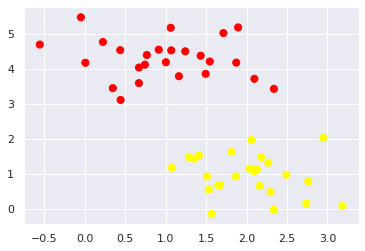

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

• A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.

• For two dimensional data like that shown here, this is a task we could do by hand.

• But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

• We can draw them as follows:

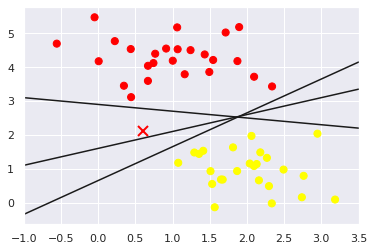

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth = 2, markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

• These are three very different separators which, nevertheless, perfectly discriminate between these samples.

• Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!

• Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

### Support Vector Machines: Maximizing the Margin

• Support vector machines offer one way to improve on this.

• The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

• Here is an example of how this might look:

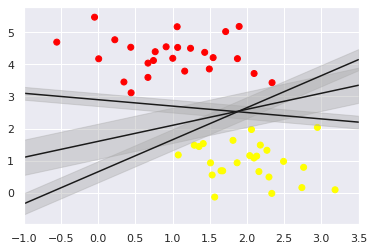

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none',
                    color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1, 3.5);

• In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.

• Support vector machines are an example of such a maximum margin estimator.

### Fitting a support vector machine

• Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.

• For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [8]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

• To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [16]:
def plot_scv_decision_function(model, ax = None, plot_support = True):
    """Plot the decision function for 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary & margins
    ax.contour(X, Y, P, colors = 'k',
              levels = [-1, 0, 1], alpha = 0.5)
    
    # Plot support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=300, linewidth = 1, facecolor = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

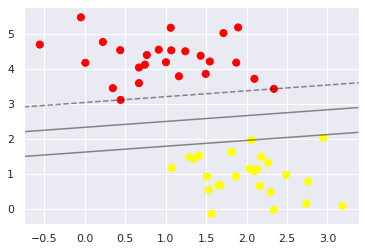

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap = 'autumn')
plot_scv_decision_function(model);

• This is the dividing line that maximizes the margin between the two sets of points.

• Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.

• These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name.

• In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [ ]:
model